In [2]:
import pandas as pd
import os
import numpy as np

current_directory = os.listdir()
match = [match for match in current_directory if 'retrieve' in match]
match = match[0]


df = pd.read_csv(match, index_col=0)


/var/folders/9b/4_3pqpvx3fs3ccpkbgvs21n40000gp/T/ipykernel_1018/3429514101.py:10: DtypeWarning: Columns (2,3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(match, index_col=0)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99178 entries, 0 to 99177
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            99178 non-null  object 
 1   01646500-00065  99178 non-null  object 
 2   01646500-00060  99178 non-null  object 
 3   01645000-00065  99178 non-null  float64
 4   01645000-00060  99178 non-null  float64
 5   01638500-00065  99178 non-null  float64
 6   01638500-00060  99178 non-null  int64  
 7   01644148-00065  99178 non-null  float64
 8   01618000-00065  99178 non-null  object 
 9   01618000-00060  99178 non-null  object 
 10  01613000-00065  99178 non-null  float64
 11  01613000-00060  99178 non-null  int64  
 12  01608500-00065  99178 non-null  float64
 13  01608500-00060  99178 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 11.4+ MB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df["01646500-00065"].astype('string').sort_values()

2516      10.0
2470      10.0
2472      10.0
2512     10.01
2513     10.02
         ...  
2469      9.99
96529      Eqp
96574      Eqp
96575      Eqp
96530      Eqp
Name: 01646500-00065, Length: 99178, dtype: string

In [6]:
df = df.where(df!='Eqp', None)

In [7]:
for col in df:
    if df[col].dtype == object:
        df[col] = pd.to_numeric(df[col])
        print('Changed ' + col + ' to numeric')

Changed 01646500-00065 to numeric
Changed 01646500-00060 to numeric
Changed 01618000-00065 to numeric
Changed 01618000-00060 to numeric


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99178 entries, 0 to 99177
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            99178 non-null  datetime64[ns]
 1   01646500-00065  99174 non-null  float64       
 2   01646500-00060  99174 non-null  float64       
 3   01645000-00065  99178 non-null  float64       
 4   01645000-00060  99178 non-null  float64       
 5   01638500-00065  99178 non-null  float64       
 6   01638500-00060  99178 non-null  int64         
 7   01644148-00065  99178 non-null  float64       
 8   01618000-00065  99177 non-null  float64       
 9   01618000-00060  99177 non-null  float64       
 10  01613000-00065  99178 non-null  float64       
 11  01613000-00060  99178 non-null  int64         
 12  01608500-00065  99178 non-null  float64       
 13  01608500-00060  99178 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usa

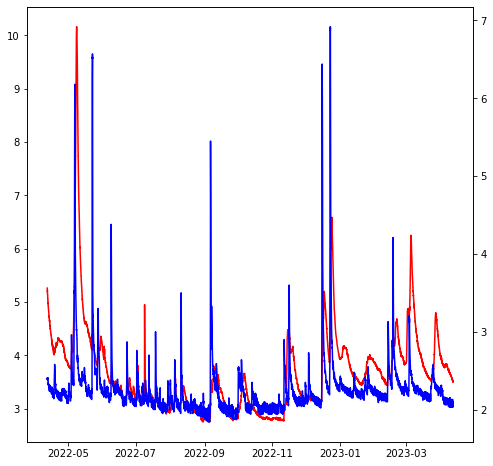

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(df['Date'], df['01646500-00065'], color = "red")
ax2.plot(df['Date'], df['01645000-00065'], color = "blue");


In [10]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

In [11]:
corr_01645000_00065 = pd.Series([crosscorr(df['01646500-00065'], df['01645000-00065'], lag=i) for i in range(500)])
corr_01645000_00065.idxmax()

140

## Best correlation for 01645000-00065 and target is at lag 145/146/143

In [12]:
corr_01644148_00065 = pd.Series([crosscorr(df['01646500-00065'], df['01644148-00065'], lag=i) for i in range(200)])
print(corr_01644148_00065.idxmax())

12


In [13]:
type(corr_01644148_00065)

pandas.core.series.Series

## Best correlation for 01644148_00065 and target is at lag 14/13

In [14]:
corr_01638500_00065 = pd.Series([crosscorr(df['01646500-00065'], df['01638500-00065'], lag=i) for i in range(200)])
corr_01638500_00065.idxmax()

14

## Best correlation for 01638500_00065 and target is at lag 16

In [15]:
corr_01618000_00065 = pd.Series([crosscorr(df['01646500-00065'], df['01618000-00065'], lag=i) for i in range(200)])
corr_01618000_00065.idxmax()

32

## Best correlation for 01618000_00065 and target is at lag 34

In [16]:
corr_01613000_00065 = pd.Series([crosscorr(df['01646500-00065'], df['01613000-00065'], lag=i) for i in range(1000)])
corr_01613000_00065.idxmax()

61

In [17]:
# pawpaw wv 01610000
#corr_01610000_00065 = pd.Series([crosscorr(df['01646500-00065'], df['01610000-00065'], lag=i) for i in range(1000)])
#corr_01610000_00065.idxmax()


# This gage is down...no data





In [18]:
# springfield wv 01608500
corr_01608500_00065 = pd.Series([crosscorr(df['01646500-00065'], df['01608500-00065'], lag=i) for i in range(1000)])
corr_01608500_00065.idxmax()


70

In [27]:
print(corr_01608500_00065)

0      0.921351
1      0.921948
2      0.922538
3      0.923123
4      0.923701
         ...   
995    0.589014
996    0.588953
997    0.588894
998    0.588834
999    0.588775
Length: 1000, dtype: float64


Highest lag correlation for each stations gage height to target gage height<br>
01645000 "Seneca Creek": around 145 / 36.25 hrs<br>
01644148 "Edwards Ferry": around 13 / 3.25 hrs<br>
01638500 "Point of Rocks": around 16 / 4 hrs<br>
01618000 "Shepardstown": around 34 / 8.5 hrs<br>
01613000 "Hancock": around 63 / 15.75 hrs<br>
01608500 "Springfield WV": around 70 / 17.5 hrs

With current stations, furthest future prediction that could be made is 17.5 hours in advance<br>
Id like to see more days in advance<br>
<br>
4 hour prediction (at little falls)...<br>
01638500 lagged to 4 hrs / 16 obs<br>


In [23]:
df = df.rename(columns={'01645000-00065': 'SenecaCreekGage',\
                       '01644148-00065' : 'EdwardsGage',\
                       '01638500-00065' : 'PointofRocksGage',\
                       '01618000-00065' : 'ShhepardstownGage',\
                       '01613000-00065' : 'HancockGage',\
                       '01608500-00065' : 'SpringfieldGage',\
                       '01646500-00065' : 'LittleFallsGage'})

In [24]:
match = match.replace('.csv', '')
match = match.replace('_retrieve_', '')

df.to_csv(match + '_for_modeling' + '.csv')